
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 3</p>
## <p style="text-align: center;">Total points: 75</p>
## <p style="text-align: center;">Due: Tuesday, October 22nd, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Please ensure that the notebook you have uploaded on Canvas is the correct one, you could download the notebook from Canvas to double check that you have submitted the correct version on your notebook.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s)
1. Ryan Harty RMH3337
2. 

# Question 1 - Stochastic Gradient Descent (30 pts)

1. (5pts) Using stochastic gradient descent, derive the coefficent updates for all 5 coefficients of the model: $$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2^2 + w_4x_2^3$$ Hint: start from the cost function (Assume sum of squared error). If you write the math by hand, include the image in your notebook and upload the image in the submission.


2. (20pts) Write Python code for an SGD solution to the non-linear model$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2^2 + w_4x_2^3$$ Try to format similarly to scikit-learn's models. The template of the class is given. The init function of the class takes as input the learning_rate, regularization_constant and number of epochs. The fit method must take as input X,y and a choice of update_rule as 'sgd' or 'sgd_momentum' or 'Adagrad'. The _predict_ method takes an X value (optionally, an array of values). Use your new gradient descent regression to predict the data given in 'samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100] . Plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) for the best 2 combinations of learning_rate and regularization for SGD, SGD-Momentum and Adagrad. I.e., you should have one plot of MSE and another for the parameter updates for SGD, SGD-Momentum and Adagrad (6 plots total). (2pts) Report the MSE at the end of 15 epochs for the two best combinations in each of SGD, SGD-Momentum and Adagrad.

Here are two blogs which you can go through to know about Adagrad - [blog 1](https://medium.com/konvergen/an-introduction-to-adagrad-f130ae871827) and [blog 2](http://ruder.io/optimizing-gradient-descent/).


3. (5pts) Based on the experiments, which of the 3 techniques allowed for a larger initial setting of the learning_rate? Why?


## Answer 

### 1.

Answer: 

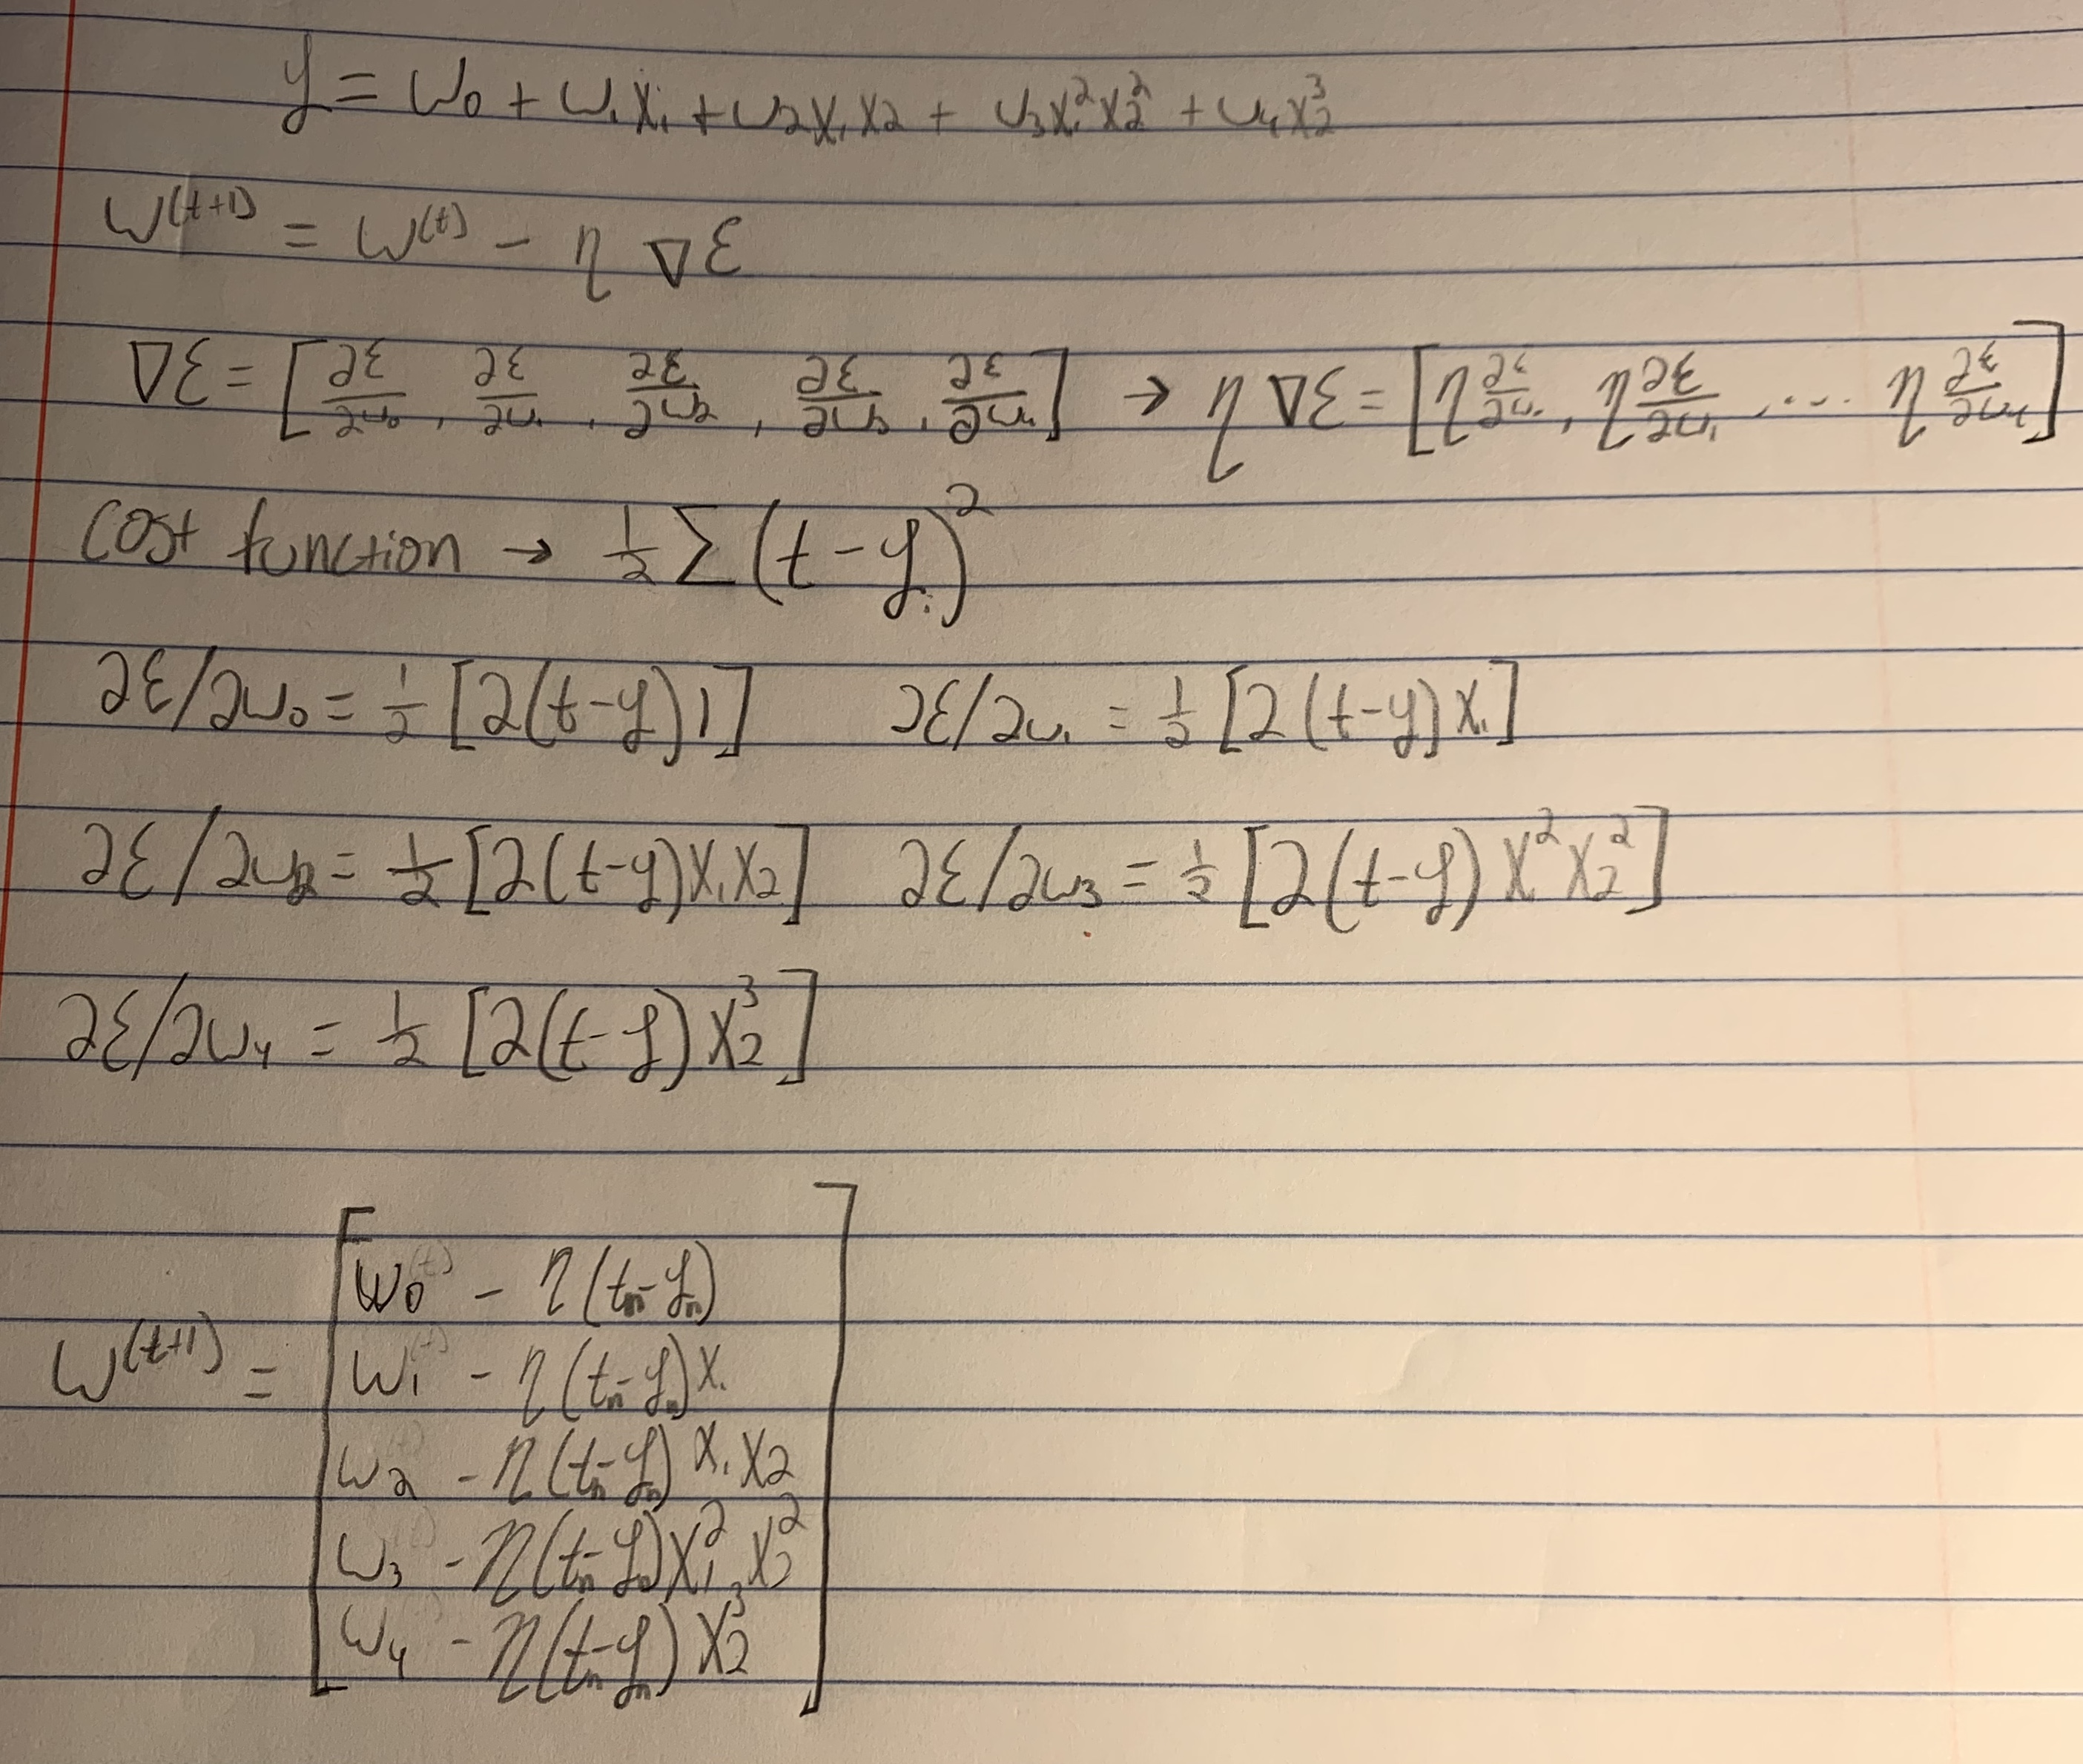

### 2.

In [747]:
%matplotlib inline
from matplotlib.font_manager import FontProperties
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error

class LinearRegression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.coef = np.zeros(5) #one coef for each of the terms
        self.eps = 10**-6 #used only for adagrad
        self.cache = np.zeros(self.coef.shape) #used only for adagrad
        self.mu = 0.9 #used in momentum


        
    def sgd(self, gradient):
        '''
        updates self.coef based on gradient using SGD
        '''
        self.coef = (self.coef - (self.learning_rate*gradient))
        return self.coef

    
    def adagrad(self, gradient):
        '''
        updates self.coef based on gradient using Adagrad
        '''
        #update each cache by the sqaure root of the gradient 
        for cache in range(len(self.cache)):
            self.cache[cache] += gradient[cache]**2
            #add self.eps so that we do not get a division by zero error 
        self.coef -= self.learning_rate / (np.sqrt(self.cache+self.eps)) * gradient
        
        
        return self.coef
        
    def sgd_momentum(self, gradient):
        '''
        updates self.coef based on gradient using Sgd_momentum
        '''
        #take all of the previous velocity and multiply it by mu to get momentum update for sgd
        self.cache = [cache*self.mu for cache in self.cache] + gradient*self.learning_rate
        self.coef = self.coef - self.cache
        return self.coef
        
    def fit(self, X, y, update_rule='sgd', plot=False):
        
        '''
        Fits the model for the given X, y. It uses the update rule mentioned by the parameter update_rule
        and displays a plot of the coefficients vs epochs and mse vs epochs if plot is True. 
        
        -> use get_features to get the features from X
        -> for epoch in epochs:
            iterate through all x, y.
                compute prediction using linearPredict.
                compute gradient.
                pass this gradient to the respective update rule and update the coefficients
                keep track of mse and coefficients
        -> plot if required
        
        '''
        #transforms features
        x_features = self.get_features(X)
        #lists to store mse and coefficients
        mse_list = []
        w0 = []
        w1 = []
        w2 = []
        w3 = []
        w4 = []
        
        #iterate through each epoch
        for epoch in range(self.n_epoch):
            #iterate through the each value in the data set
            for i in range(len(y)):
                
                #predicts y_predicted
                pred = self.linearPredict(x_features[i])
                dot = np.array(x_features[i]).T.dot(y[i]-pred)
                #add regularization to put weight on the coefficients
                grad = -2*dot + 2*self.regularization * self.coef
                
                #send gradient to the chosen update method
                if update_rule == 'sgd':
                    self.coef = self.sgd(grad)
                elif update_rule =='adagrad':
                    self.coef = self.adagrad(grad)
                elif update_rule =='sgd_momentum':
                    self.coef = self.sgd_momentum(grad)
                if y[i]-pred > 9999:
                    break
            
            #update lists
            try:
                pred = self.linearPredict(x_features)
                mse = mean_squared_error(pred, y)
                mse_list.append(mse)
                w0.append(self.coef[0])
                w1.append(self.coef[1])
                w2.append(self.coef[2])
                w3.append(self.coef[3])
                w4.append(self.coef[4])
            
            except ValueError:
                break
            
                
        #generates plots 
        if plot==True:
            f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,12))
            ax1.plot(mse_list, marker='o',linestyle='dotted')
            ax1.set_title('MSE vs Epochs: Regularization = {}'.format(self.regularization))
            ax1.set_xlabel('Epochs')
            ax1.set_ylabel('MSE')
            ax2.plot(w0, marker='o',linestyle='dotted', label='W0')
            ax2.plot(w1, marker='o',linestyle='dotted', label='W1')
            ax2.plot(w2, marker='o',linestyle='dotted', label='W2')
            ax2.plot(w3, marker='o',linestyle='dotted', label='W3')
            ax2.plot(w4, marker='o',linestyle='dotted', label='W4')
            ax2.set_xlabel('Epochs')
            ax2.set_ylabel('Coefficients')
            ax2.set_title('Coefficients vs Epochs: Learning Rate = {}'.format(self.learning_rate))
            ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        return mse
            

    def get_features(self, X):
        #creates list for each x to be transformed. I set the W0 to 1
        one = []
        x1 = []
        x2 = []
        x3 = []
        x4 = []
        # 1, X_1, X_1X_2, X_1^2X_2^2, X_2^3
        for x in X:
            x1.append(x[0])
            x2.append(x[0]*x[1])
            x3.append((x[0]**2)*(x[1]**2))
            x4.append(x[1]**3)
            one.append(1)

        x_features = np.column_stack((one, x1, x2, x3, x4))
        return x_features
        '''
       X (input) is the nx2 dimensional array - n data points with X_1 and X_2.
       It returns a nX5 dimensional array - n data points with 1, X_1, X_1X_2, X_1^2X_2^2, X_2^3.
       '''
        
    def linearPredict(self, X_features):
        return np.matmul(X_features, self.coef)
        
        '''returns the dot product of X and self.coef'''


In [748]:
%pylab inline
plt.style.use('ggplot')
data = pd.read_csv('q1_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]


Populating the interactive namespace from numpy and matplotlib


C:\Users\19785\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Using SGD


Best MSE: 
Second Best MSE: 


0.02636878158524711

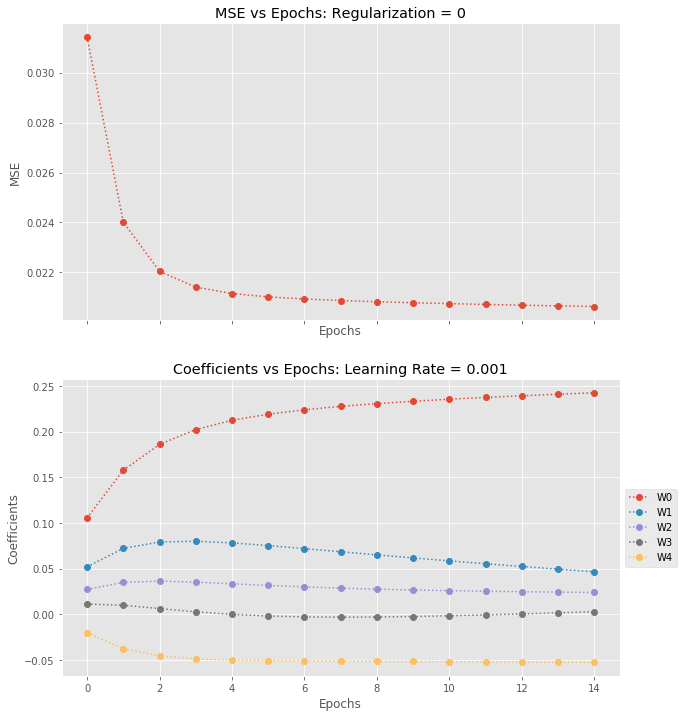

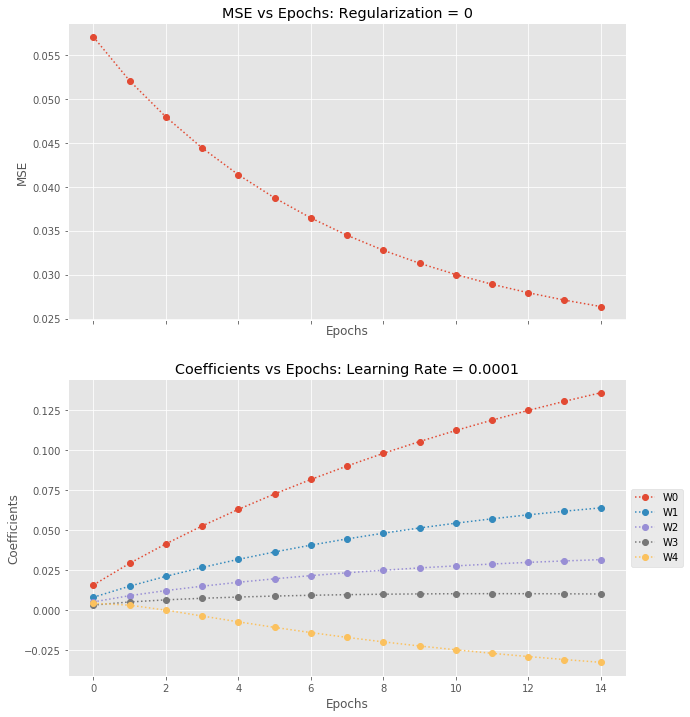

In [749]:
best_mse = []
place_holder = []
for x in learning_rate:
    for z in regularization:
        reg = LinearRegression(x, z, n_epochs)
        best = reg.fit(X,y, update_rule='sgd')
        best_mse.append(best)
        place_holder.append([x,z])
        
print('Best MSE: ')
best_index = best_mse.index(min(best_mse))
best = LinearRegression(place_holder[best_index][0], place_holder[best_index][1], n_epochs)
best.fit(X,y, update_rule='sgd', plot=True)

best_mse.remove(min(best_mse))
print('Second Best MSE: ')
second_best_index = best_mse.index(min(best_mse))
best = LinearRegression(place_holder[second_best_index][0], place_holder[second_best_index][1], n_epochs)
best.fit(X,y, update_rule='sgd', plot=True)

### Using SGD-Momentum

Second Best MSE: 


0.0206163292489942

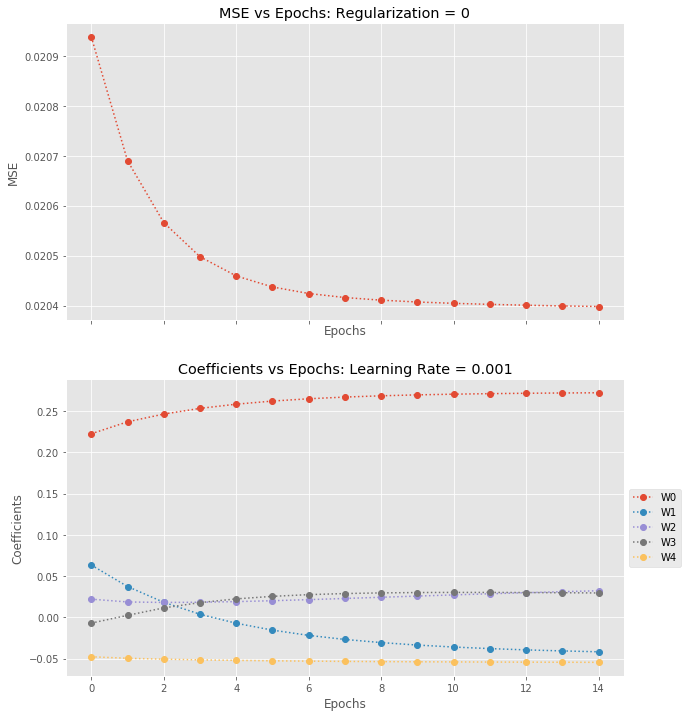

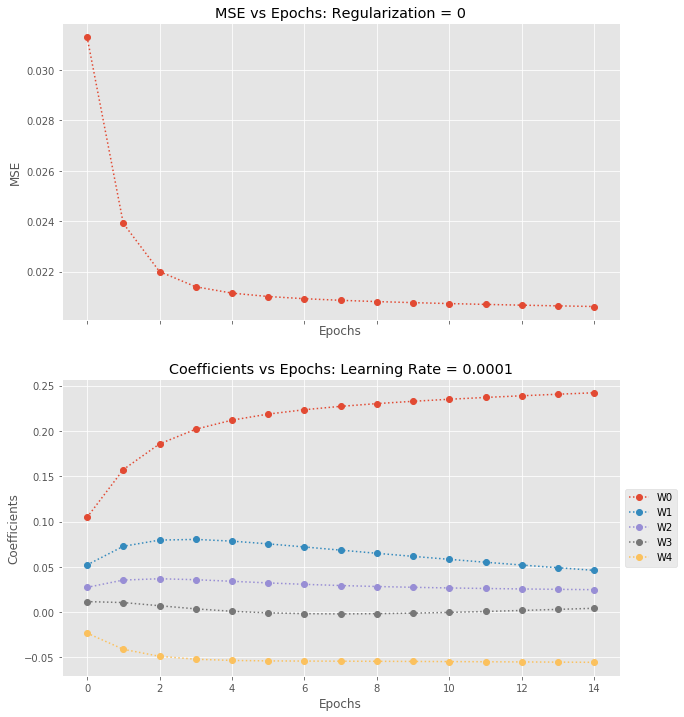

In [741]:
best_mse = []
place_holder = []
for x in learning_rate:
    for z in regularization:
        reg = LinearRegression(x, z, n_epochs)
        best = reg.fit(X,y, update_rule='sgd_momentum')
        best_mse.append(best)
        place_holder.append([x,z])
        
        
best_index = best_mse.index(min(best_mse))
best = LinearRegression(place_holder[best_index][0], place_holder[best_index][1], n_epochs)
best.fit(X,y, update_rule='sgd_momentum', plot=True)


best_mse.remove(min(best_mse))
print('Second Best MSE: ')
second_best_index = best_mse.index(min(best_mse))
best = LinearRegression(place_holder[second_best_index][0], place_holder[second_best_index][1], n_epochs)
best.fit(X,y, update_rule='sgd_momentum', plot=True)

### Using Adagrad

Second Best MSE: 


0.021012616157499216

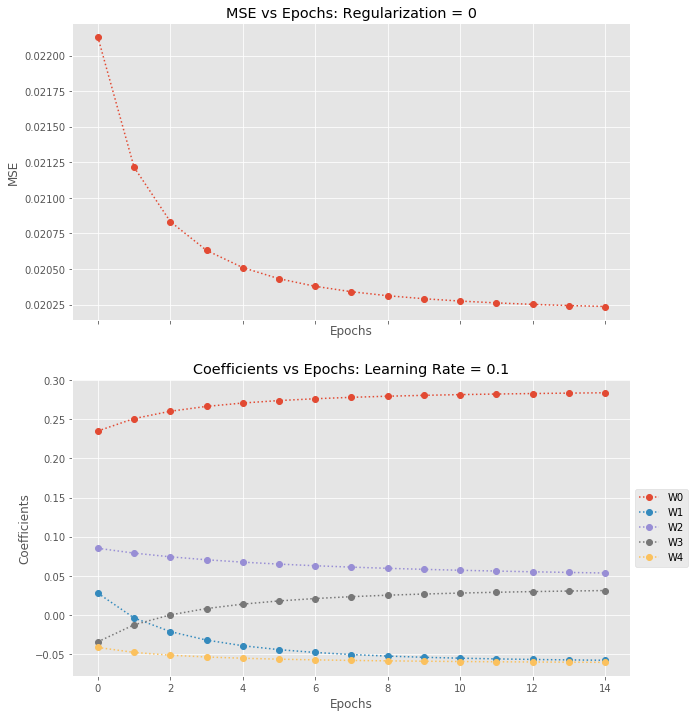

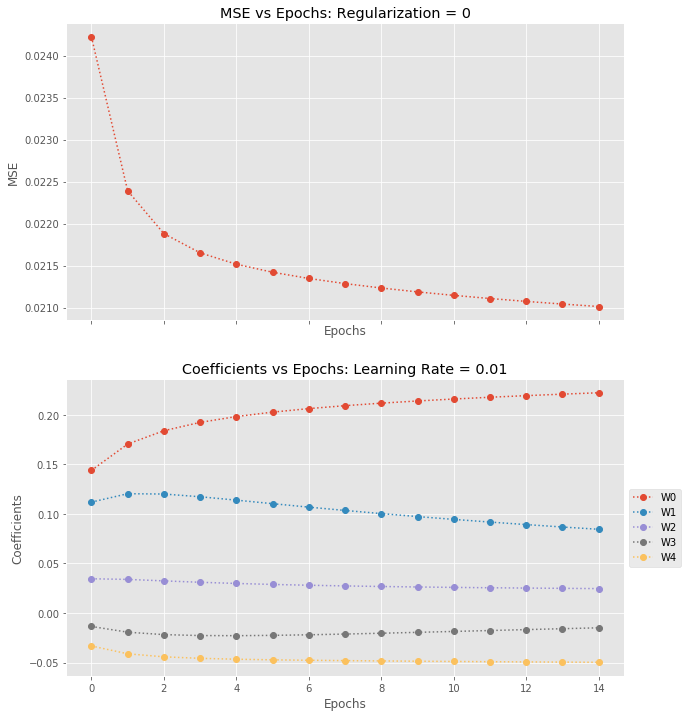

In [742]:
best_mse = []
place_holder = []
for x in learning_rate:
    for z in regularization:
        reg = LinearRegression(x, z, n_epochs)
        best = reg.fit(X,y, update_rule='adagrad')
        best_mse.append(best)
        place_holder.append([x,z])
        
        
best_index = best_mse.index(min(best_mse))
best = LinearRegression(place_holder[best_index][0], place_holder[best_index][1], n_epochs)
best.fit(X,y, update_rule='adagrad', plot=True)


best_mse.remove(min(best_mse))
print('Second Best MSE: ')
second_best_index = best_mse.index(min(best_mse))
best = LinearRegression(place_holder[second_best_index][0], place_holder[second_best_index][1], n_epochs)
best.fit(X,y, update_rule='adagrad', plot=True)

### 3.

Ans.

AdaGrad allowed for the highest learning rate without divergence. As the iterations increased, the learning rate decreased and this allowed for a high learning rate to scale down to a level where it converged at the local minima.


# 2.  Tensor Playground (25pts)
Visit http://playground.tensorflow.org for this problem

From the far right, select "Classification" as the problem type, and select the 4th of the four data sets (the spiral data which is bottom right).  

1) Use the following default settings - test/training ratio 50%, Noise 0, Batch Size 10, learning rate 0.03, one hidden layer with 4 neurons, input as X_1, X_2 and no Regularization. Run two experiments - one using Tanh as the activation function and one using the linear activation function. Report the train, test losses for both these experiments at the end of 1000 epochs(4 values). What difference do you observe in the decision boundary? Why? (4 pts)

2) Use the above setting, set the activation to be Tanh and learning rate to be 0.03. Report the train, test losses at the end of 1000 epochs for 2, 4, and 8 neurons in the hidden layer (6 values). What do you observe in the decision boundary as the number of neurons increases? Why? (4 pts)

3) Use the above setting, set the activation to be Tanh and have four neurons in the hidden layer. Report the train, test losses at the end of 100 epochs and 1000 epochs for learning rates of 3, 0.3, 0.03 and 0.003 (8 values). What do you observe in the loss curves? Explain. (4 pts)

4) Use the above setting, set the activation to be Tanh and learning rate to be 0.03. Use two hidden layers - first hidden layer with 6 neurons and second hidden layer with 4 neurons. Report the train, test values at the end of 2000 epochs (2 values) and attach the screenshot from Tensor playground. Explain the changes you see with this additional hidden layer. (5 pts).

5) Fix the test/training ratio 50% and Noise to 0 (same as before). Play around with any of the other hyperparameters, network architectures and input features (such as $sin(X_1), X_1^2$ etc.) and report the best train/test loss you could get (test loss should be atmost 0.06). Attach the screenshot from  Tensor playground for the same (show your full network, output and parameters). Briefly justify your decisions, and comment on difficulties/tradeoffs, what helps/what doesn't,etc.  (8 pts)
 

### ANSWER

### 1. 
OUTPUT Tanh

Test loss 0.477
Training loss 0.368

OUTPUT Linear

Test loss 0.477
Training loss 0.468

The decision boundary for the linear output was a straight line and as a result did not get any better as the number of epochs increased. The decision boundary for the tanh output was able to move a bit more freely, but still had troulbe to capturing the right shape of the model for the test data.  

### 2. 
OUTPUT for 2 neurons

Test loss 0.503
Training loss 0.453

OUTPUT for 4 neurons

Test loss 0.504
Training loss 0.332

OUTPUT for 8 neurons

Test loss 0.474
Training loss 0.368

As the number of neurons increased the decision boundary became more adaptable to the true shape of the function and thus resulted in a smaller test loss. 

### 3.


# 100 Epochs


#### Learning rate 3  

OUTPUT
Test loss 0.648
Training loss 0.530

#### Learning rate .3  

OUTPUT
Test loss 0.518
Training loss 0.415

#### Learning rate .03 

OUTPUT
Test loss 0.498
Training loss 0.454

#### Learning rate .003

OUTPUT
Test loss 0.512
Training loss 0.458


# 1000 Epochs


#### Learning rate 3  

OUTPUT
Test loss 0.759
Training loss 0.528

#### Learning rate .3 

OUTPUT
Test loss 0.470
Training loss 0.336

#### Learning rate .03 

OUTPUT
Test loss 0.498
Training loss 0.376

#### Learning rate .003

OUTPUT
Test loss 0.503
Training loss 0.450

For small learning rates, the model performed better when there were 1000 epochs opposed to 100.
When the learning rate was large, the model performed better when there were 100 epochs opposed to 1000.

### 4.

### The decision boundary fits the data much better with two hidden layers than it did with only a single layer. It is able to capture the noise that the data has with much more precision. 

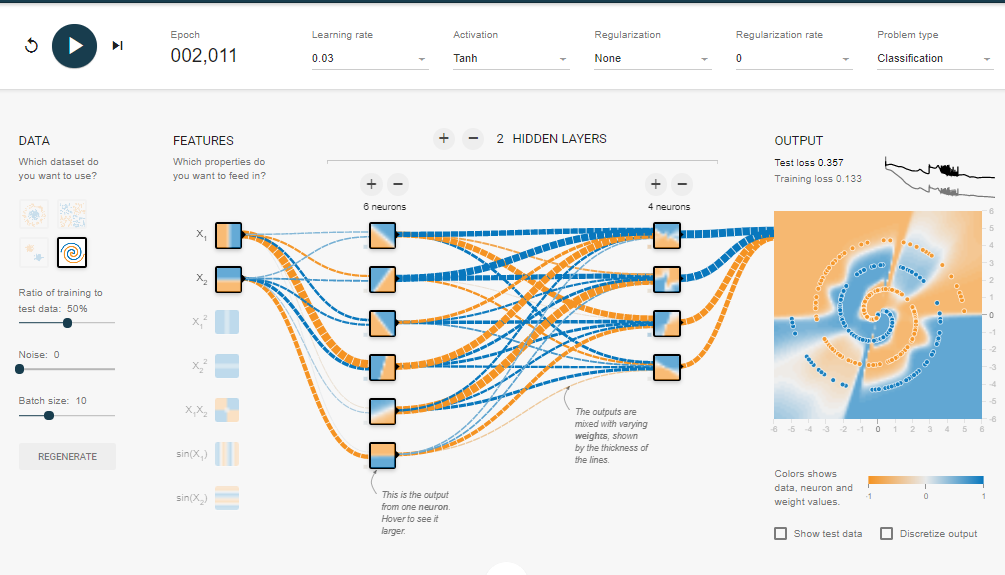

### 5.

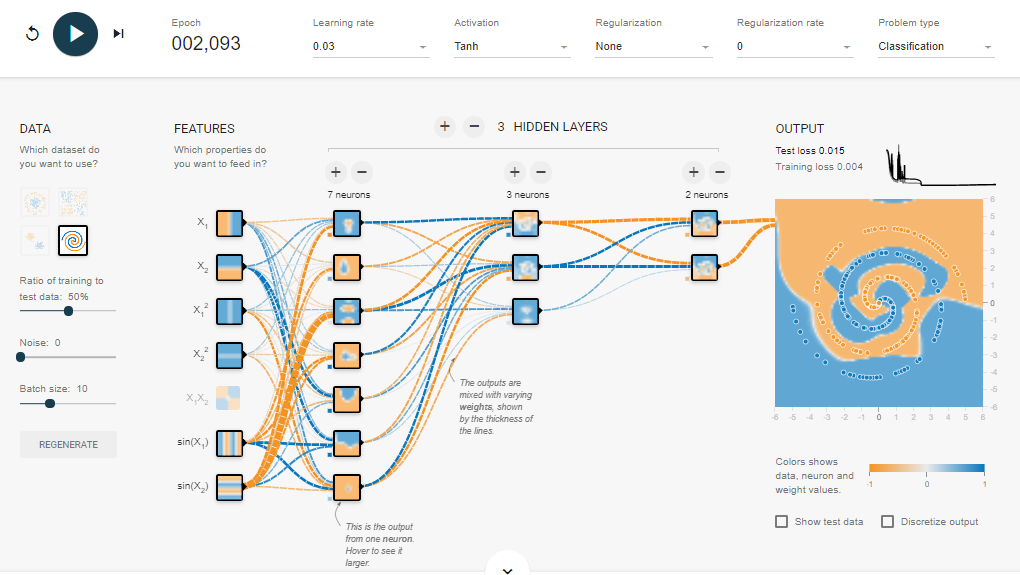

# Question 3: Decision Trees

1. (5pts) In this question, we will learn to build a Decision Tree classifier. Load the q3_dataset.csv from the files. The column named 'label' is the $Y$ we are trying to predict using the features given in all other columns. As usual, we first split the data in a train and test set and build our model on train set and test the performance on the test set. Use the class tree.DecisionTreeClassifier (http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree) to fit a model with default parameters and report its performance on the test data. Now, visualize the tree, for visualisation, if your classifier object is called clf, use the given commands to save the generated tree as a '.dot' file using export_graphviz(https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html) and paste the contents of the file in Webgraphviz (http://www.webgraphviz.com/) to generate the tree.


In [671]:
## read data
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
data= pd.read_csv('q3_dataset.csv')
x = data.drop(['label'],axis=1)
y = data.label.values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=20)

In [672]:
## create train/test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=20)

In [697]:
from sklearn.metrics import classification_report, confusion_matrix

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

# DecisionTreeClassifier.
predict = clf.predict(x_test)

print(clf.score(x_test,y_test))
print('\n',confusion_matrix(y_test, predict),'\n')
print(classification_report(y_test, predict))

0.9473684210526315

 [[64  2]
 [ 4 44]] 

              precision    recall  f1-score   support

           B       0.94      0.97      0.96        66
           M       0.96      0.92      0.94        48

   micro avg       0.95      0.95      0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



In [674]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [678]:
dot_data = tree.export_graphviz(clf)
# graph = graphviz.Source(dot_data) 
dot_data

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[27] <= 0.142\\ngini = 0.461\\nsamples = 455\\nvalue = [291, 164]"] ;\n1 [label="X[23] <= 957.45\\ngini = 0.15\\nsamples = 305\\nvalue = [280, 25]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[13] <= 35.435\\ngini = 0.073\\nsamples = 288\\nvalue = [277, 11]"] ;\n1 -> 2 ;\n3 [label="X[23] <= 785.75\\ngini = 0.029\\nsamples = 270\\nvalue = [266, 4]"] ;\n2 -> 3 ;\n4 [label="X[21] <= 33.27\\ngini = 0.008\\nsamples = 247\\nvalue = [246, 1]"] ;\n3 -> 4 ;\n5 [label="gini = 0.0\\nsamples = 232\\nvalue = [232, 0]"] ;\n4 -> 5 ;\n6 [label="X[21] <= 33.56\\ngini = 0.124\\nsamples = 15\\nvalue = [14, 1]"] ;\n4 -> 6 ;\n7 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 1]"] ;\n6 -> 7 ;\n8 [label="gini = 0.0\\nsamples = 14\\nvalue = [14, 0]"] ;\n6 -> 8 ;\n9 [label="X[0] <= 13.85\\ngini = 0.227\\nsamples = 23\\nvalue = [20, 3]"] ;\n3 -> 9 ;\n10 [label="gini = 0.0\\nsamples = 3\\nvalue = [0, 3]"] ;\n9 -> 10 ;\n11 [label="gi

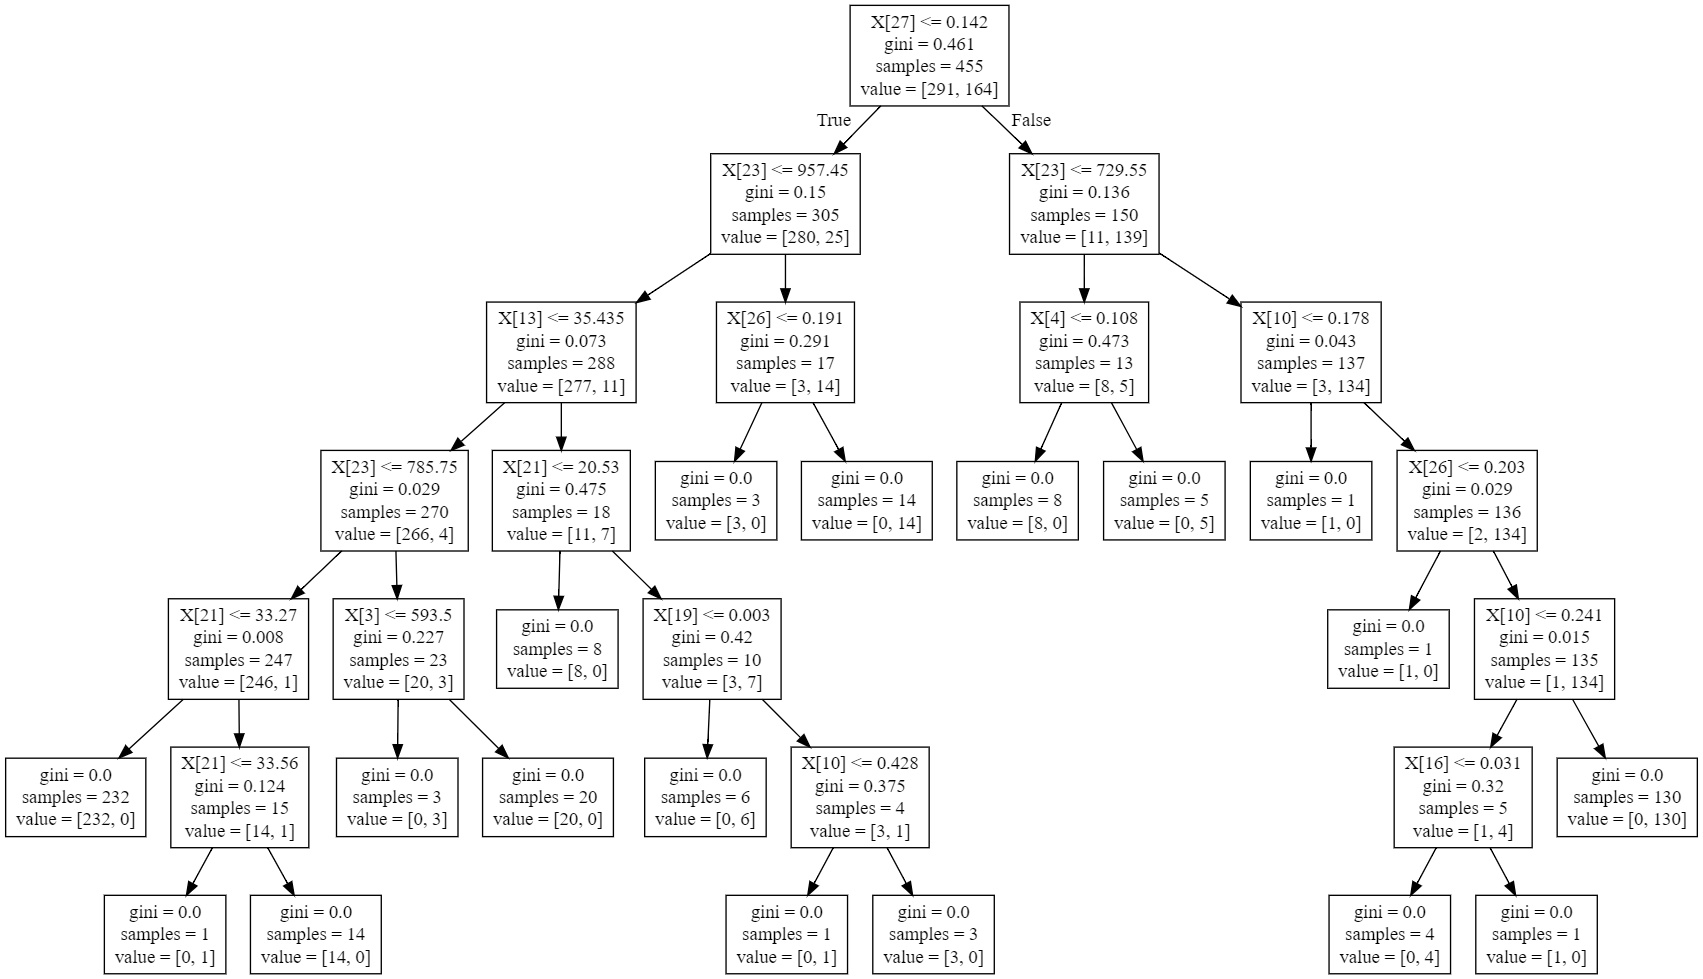

2. (10pts) We can guide the learning of a Decision Tree classifier by specifying various parameters governing its construction. For example, the max_depth parameter forces the algorithm to stop after at most that many levels, the min_samples_split parameter lower bounds the amount of data required to split nodes when learning and the parameter called criterion determines what function to use to create splits at each node. For both type of criteria, gini and entropy, test the max_depth values in the range 1, 2, ..., 20 , and min_samples_split in the range $2^{1}, 2^{2}, ..., 2^{15}$. Visualise the best classification trees that you get for different criterion parameter and observe how do they differ. 

In [698]:
score_list = []
depth_list = []
sample_list = []
count = 0
for x in range(20):
    for y in range(15):
        sample = 2**(y+1)
        depth = x+1
        clf = DecisionTreeClassifier(max_depth=depth, 
                                     min_samples_split=sample, criterion='gini')
        clf.fit(x_train, y_train)

        # DecisionTreeClassifier.
        predict = clf.predict(x_test)

        score = clf.score(x_test,y_test)
        
        if count == 0:
            score_list.append(score)
            depth_list.append(depth)
            sample_list.append(sample)
        elif score > score_list[-1]:
            score_list.append(score)
            depth_list.append(depth)
            sample_list.append(sample)
        count += 1

print('Top Score:\n', score_list[-1])
print('Max Depth of Top Score:\n', depth_list[-1])
print('Min Samples Split of Top Score:\n', sample_list[-1])

clf_gini = DecisionTreeClassifier(max_depth=2, 
                                     min_samples_split=256)
clf_gini.fit(x_train, y_train)
dot_data_gini = tree.export_graphviz(clf_best)
 
        

predict_gini = clf_gini.predict(x_test)

print(clf_gini.score(x_test,y_test))
print('\n',confusion_matrix(y_test, predict_gini),'\n')
print(classification_report(y_test, predict_gini))

Top Score:
 0.9736842105263158
Max Depth of Top Score:
 2
Min Samples Split of Top Score:
 256
0.9736842105263158

 [[65  1]
 [ 2 46]] 

              precision    recall  f1-score   support

           B       0.97      0.98      0.98        66
           M       0.98      0.96      0.97        48

   micro avg       0.97      0.97      0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [680]:
dot_data_gini

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[27] <= 0.142\\ngini = 0.461\\nsamples = 455\\nvalue = [291, 164]"] ;\n1 [label="X[23] <= 957.45\\ngini = 0.15\\nsamples = 305\\nvalue = [280, 25]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.073\\nsamples = 288\\nvalue = [277, 11]"] ;\n1 -> 2 ;\n3 [label="gini = 0.291\\nsamples = 17\\nvalue = [3, 14]"] ;\n1 -> 3 ;\n4 [label="gini = 0.136\\nsamples = 150\\nvalue = [11, 139]"] ;\n0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n}'

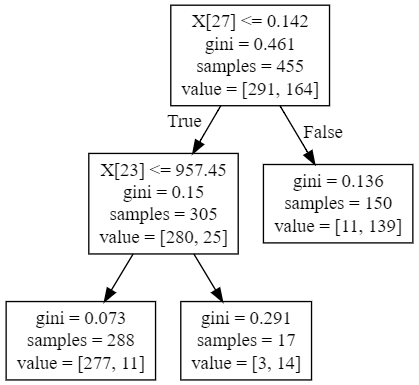

In [699]:
score_list = []
depth_list = []
sample_list = []
count = 0
for x in range(20):
    for y in range(15):
        sample = 2**(y+1)
        depth = x+1
        clf = DecisionTreeClassifier(max_depth=depth, 
                                     min_samples_split=sample, criterion='entropy')
        clf.fit(x_train, y_train)

        # DecisionTreeClassifier.
        predict = clf.predict(x_test)

        score = clf.score(x_test,y_test)
        
        if count == 0:
            score_list.append(score)
            depth_list.append(depth)
            sample_list.append(sample)
        elif score > score_list[-1]:
            score_list.append(score)
            depth_list.append(depth)
            sample_list.append(sample)
        count += 1

print('Top Score:\n', score_list[-1])
print('Max Depth of Top Score:\n', depth_list[-1])
print('Min Samples Split of Top Score:\n', sample_list[-1])

clf_ent = DecisionTreeClassifier(max_depth=3, 
                                     min_samples_split=32, criterion='entropy')
clf_ent.fit(x_train, y_train)
dot_data_best_entropy = tree.export_graphviz(clf_best)
 
        


predict_ent = clf_ent.predict(x_test)

print(clf_ent.score(x_test,y_test))
print('\n',confusion_matrix(y_test, predict_ent),'\n')
print(classification_report(y_test, predict_ent))

Top Score:
 0.9824561403508771
Max Depth of Top Score:
 3
Min Samples Split of Top Score:
 32
0.9824561403508771

 [[65  1]
 [ 1 47]] 

              precision    recall  f1-score   support

           B       0.98      0.98      0.98        66
           M       0.98      0.98      0.98        48

   micro avg       0.98      0.98      0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [693]:
dot_data_best_entropy

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[7] <= 0.049\\nentropy = 0.943\\nsamples = 455\\nvalue = [291, 164]"] ;\n1 [label="X[20] <= 16.83\\nentropy = 0.298\\nsamples = 284\\nvalue = [269, 15]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[13] <= 48.7\\nentropy = 0.135\\nsamples = 266\\nvalue = [261, 5]"] ;\n1 -> 2 ;\n3 [label="entropy = 0.09\\nsamples = 264\\nvalue = [261, 3]"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 2\\nvalue = [0, 2]"] ;\n2 -> 4 ;\n5 [label="entropy = 0.991\\nsamples = 18\\nvalue = [8, 10]"] ;\n1 -> 5 ;\n6 [label="X[22] <= 114.45\\nentropy = 0.554\\nsamples = 171\\nvalue = [22, 149]"] ;\n0 -> 6 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n7 [label="X[21] <= 25.745\\nentropy = 0.997\\nsamples = 47\\nvalue = [22, 25]"] ;\n6 -> 7 ;\n8 [label="entropy = 0.667\\nsamples = 23\\nvalue = [19, 4]"] ;\n7 -> 8 ;\n9 [label="entropy = 0.544\\nsamples = 24\\nvalue = [3, 21]"] ;\n7 -> 9 ;\n10 [label="entropy = 0.0\\nsam

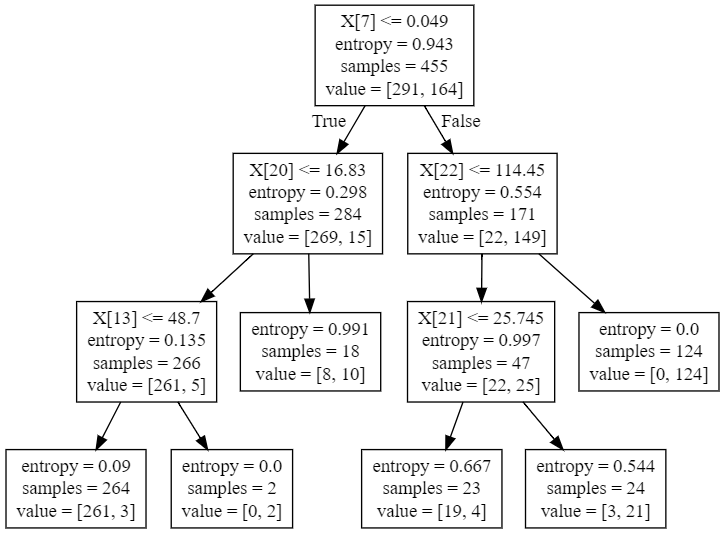

## Question 4: Bayes Optimal Classification (5 pts)

1. Consider the following classification problem with only one input feature. We have two biased coins, coin 1 and 2. For coin 1, $P(heads) = p$ and for coin 2, $P(heads) = q$. We know that $p > q$. Given the output of a coin toss, we have to predict which coin was used for this toss. Assume we select both the coins for tossing with equal probability. What is the Bayes optimal classifier and what is its error rate?

Since there is equal likelyhood of picking either coin, the optimal classifier is 50% probability of being coin 1 and 50% probability of being coin 2.

Coin 1: 𝑃(ℎ𝑒𝑎𝑑𝑠)=𝑝 

Coin 2: 𝑃(ℎ𝑒𝑎𝑑𝑠)=𝑞 

Where: 𝑝>𝑞

### Heads
Probability(Coin 1|Heads) = p/(p+q)

Probability(Coin 2|Heads) = q/(p+q)

### Tails
Probability(Coin 1|Tails) = (1-p)/((1-p)+(1-q))

Probability(Coin 2|Tails) = (1-q)/((1-p)+(1-q))

### Error Rate
Error Rate for predicting coin 1: q/(p+q)

Error Rate for predicting coin 2:(1-p)/((1-p)+(1-q))

Total Error Rate:( (1- (q/(p+q)) + (1 - (1-p)/((1-p)+(1-q))) ) / 2